In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from plot import plot_scores

In [5]:
from run import run

In [6]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

In [7]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [8]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [9]:
from ddpg_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=0)

In [8]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.2199999950826168


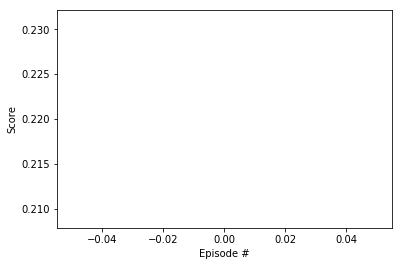

In [9]:
plot_scores(scores)

In [10]:
scores

array([0.22])

In [14]:
scores = run(env, agent, n_episodes=200)

/home/yipstar/anaconda3/envs/drl/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 0.30
Episode 200	Average Score: 0.62


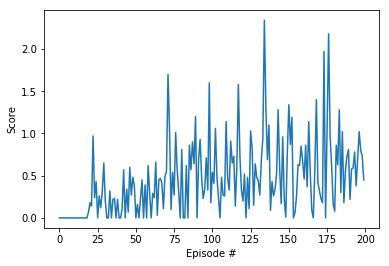

In [16]:
plot_scores(scores)

In [18]:
scores = run(env, agent, n_episodes=300)

/home/yipstar/anaconda3/envs/drl/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/yipstar/drl/projects/p2_continuous-control/ddpg_agent.py:109: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  actor_loss = -self.critic_local(states, actions_pred).mean()


Episode 100	Average Score: 0.20
Episode 200	Average Score: 0.33
Episode 300	Average Score: 0.31


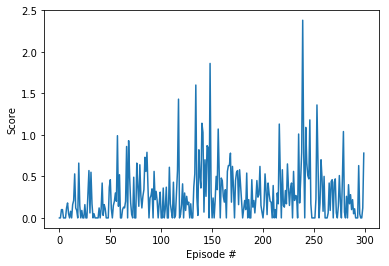

In [19]:
plot_scores(scores)

In [22]:
scores = run(env, agent, n_episodes=200)

/home/yipstar/anaconda3/envs/drl/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/yipstar/drl/projects/p2_continuous-control/ddpg_agent.py:117: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  self.soft_update(self.actor_local, self.actor_target, TAU)


Episode 100	Average Score: 1.60
Episode 200	Average Score: 2.19


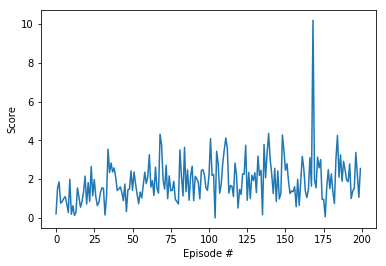

In [23]:
plot_scores(scores)

In [10]:
scores = run(env, agent, n_episodes=50, max_t=2000)

/home/yipstar/anaconda3/envs/drl/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/yipstar/drl/projects/p2_continuous-control/ddpg_agent.py:126: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode 50	Average Score: 0.54

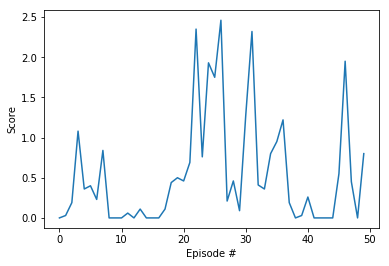

In [11]:
plot_scores(scores)

In [15]:
scores = run(env, agent, n_episodes=100, max_t=2000)

/home/yipstar/anaconda3/envs/drl/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/yipstar/drl/projects/p2_continuous-control/ddpg_agent.py:126: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode 100	Average Score: 0.68


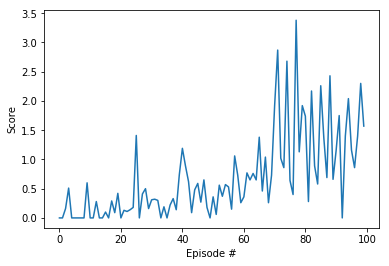

In [16]:
plot_scores(scores)

In [22]:
scores = run(env, agent, n_episodes=500, max_t=2000)

/home/yipstar/anaconda3/envs/drl/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/yipstar/drl/projects/p2_continuous-control/ddpg_agent.py:137: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  


Episode 100	Average Score: 0.93
Episode 200	Average Score: 1.65
Episode 300	Average Score: 1.64
Episode 400	Average Score: 2.53
Episode 500	Average Score: 2.72


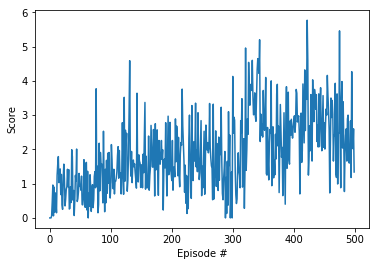

In [23]:
plot_scores(scores)

In [12]:
scores = run(env, agent, n_episodes=1000, max_t=2000)

/home/yipstar/anaconda3/envs/drl/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/home/yipstar/drl/projects/p2_continuous-control/ddpg_agent.py:137: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode 100	Average Score: 5.71
Episode 200	Average Score: 10.20
Episode 300	Average Score: 15.27
Episode 400	Average Score: 25.30
Episode 472	Average Score: 30.03
Environment solved in 372 episodes!	Average Score: 30.03


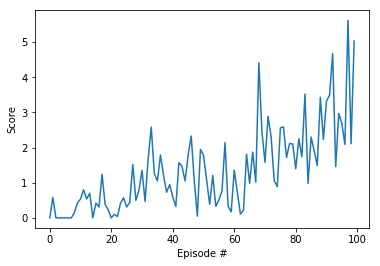

In [11]:
plot_scores(scores)

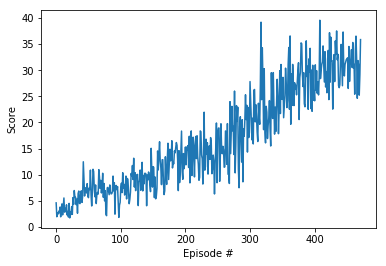

In [13]:
plot_scores(scores)